In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import category_encoders as ce
%matplotlib inline

plt.style.use('bmh')

# Chargement des datasets

In [2]:
train = pd.read_csv('./input/train.csv')

In [3]:
test = pd.read_csv('./input/test.csv')

UserKey contient les headers de colonnes du fichier User avec la description du champ. Ces colonnes étant déjà présentes dans le csv user, ce fichier n'a qu'une visée descriptive. Nous le reformatons pour pouvoir afficher le contenu dans le notebook.

In [4]:
with open('./input/UserKey.csv', encoding='utf-8') as infile, open('./input/quotedUserKey.csv','w', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for line in reader:
        if len(line) > 2:
            temp_line = line[1]
            for i in range(2, len(line)):
                line[1] +=', '+line[i]
            line = line[:2]
        writer.writerow(line)                        

In [5]:
user_key = pd.read_csv('./input/quotedUserKey.csv', header=None)

In [6]:
#Affiche l'intégralité du champ
pd.set_option('display.max_colwidth', -1)
user_key

,0,1
0,RESPID,User id
1,GENDER,Male/Female
2,AGE,Age in years
3,WORKING,Working status
4,REGION,Region of the UK
5,MUSIC,Listening to music that you have chosen / bought (eg. playing CDs or listening to your iPod) -
6,LIST_OWN,Listening to music that may be on in the background (e.g. the radio or a streaming service like last.fm) -
7,LIST_BACK,Listening to music that may be on in the background (e.g. the radio or a streaming service like last.fm) -
8,Q1,"I enjoy actively searching for and discovering music that I have never heard before (Thinking now about music, to what extent would you agree or disagree with the following statements?)"
9,Q2,"I find it easy to find new music (Thinking now about music, to what extent would you agree or disagree with the following statements?)"


In [7]:
users = pd.read_csv('./input/users.csv')

le csv 'words' contient des caractères non compatibles avec le format utf-8, nous réenregistrons le fichier sous le bon format à l'aide d'un éditeur de texte.

In [8]:
words = pd.read_csv('./input/words.csv')

L'objectif de ce challenge est de prédire la valeur de la variable "Rating" sur le jeu de test. Cette variable a une valeur entière comprise entre X-100, comme il s'agit d'une notation, nous pouvons dire que c'est une variable continue et donc quil s'agit d'un problème de régression. De plus la métrique  d'évaluation est RMSE (Root Mean Squared Error) ce qui est une métrique de régression. L'objectif est d'obtenir un csv conenant les prédictions des évaluations pour le jeu de test.

In [9]:
train.head(10)

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
5,31,79,27130,37,11
6,21,48,19623,69,21
7,2,174,47505,28,17
8,12,34,15290,12,8
9,28,73,24151,70,22


In [10]:
test.head(10)

,Artist,Track,User,Time
0,1,6,3475,18
1,6,149,39210,15
2,40,177,47861,17
3,31,79,27413,11
4,26,66,23232,22
5,26,61,22055,22
6,2,68,24799,22
7,25,59,18862,21
8,0,150,38832,15
9,1,6,2963,18


In [11]:
users.head(2)

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily more important,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily more important,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0


In [12]:
words.head(10)

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
5,23,18082,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
6,23,18080,Never heard of,NaN,NaN,NaN,NaN,0.0,1,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
7,14,31541,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
8,46,43802,Heard of and listened to music EVER,Own none of their music,25.0,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
9,23,18077,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0,NaN,NaN


# Exploration de données

## Analyse des csv train et test

Les fichiers train.csv et test.csv ne comportent pas de valeurs nulles, et toutes les colonnes sont de type int64. 

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188690 entries, 0 to 188689
Data columns (total 5 columns):
Artist    188690 non-null int64
Track     188690 non-null int64
User      188690 non-null int64
Rating    188690 non-null int64
Time      188690 non-null int64
dtypes: int64(5)
memory usage: 7.2 MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125794 entries, 0 to 125793
Data columns (total 4 columns):
Artist    125794 non-null int64
Track     125794 non-null int64
User      125794 non-null int64
Time      125794 non-null int64
dtypes: int64(4)
memory usage: 3.8 MB


Les csv de train et de test ne comportent que des valeurs numériques et ne présentent pas de valeur nulle. Nous remarquons qu'il  a 50 artistes pour 184 chansons et 50928 répondants. La majorité des artistes, chansons et répondants ont l'air de se retrouver dans les jeux de données de train et de test. Les ratings vont de 0 à 100 et la colonne time est encodée sur 24 entiers (probablement l'heure où l'étude à été faite). D'après la répartition des variables sur ces deux csv, ils semblent à priori similaires sur leur contenus.

In [15]:
train.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


In [16]:
test.describe()

,Artist,Track,User,Time
count,125794.000000,125794.000000,125794.000000,125794.000000
mean,22.242245,86.381926,26453.600569,15.668569
std,14.479083,55.993542,13629.383620,6.450643
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17673.250000,12.000000
50%,22.000000,80.000000,27809.000000,17.000000
75%,35.000000,142.000000,35921.750000,21.000000
max,49.000000,183.000000,50927.000000,23.000000


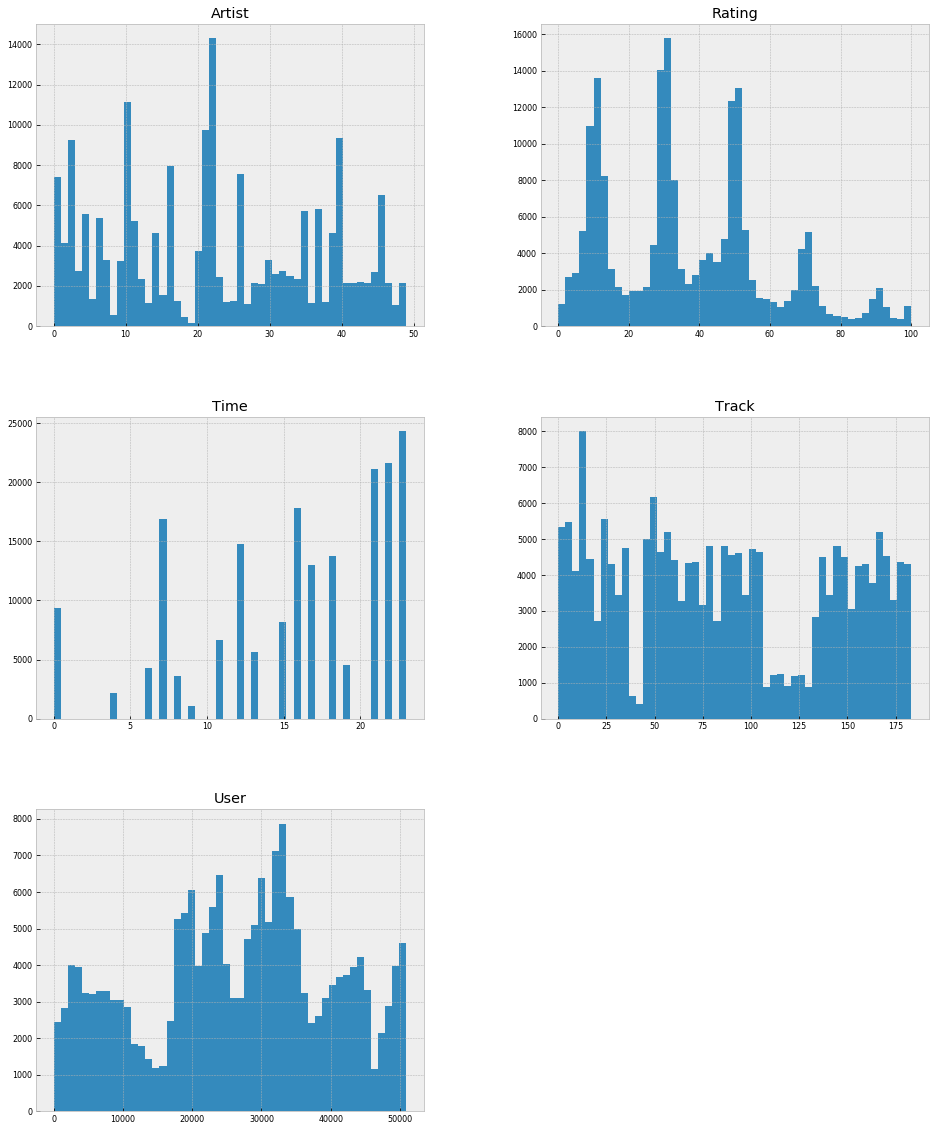

In [17]:
# Répartition des valeurs numériques - Train
train_num = train.select_dtypes(include = ['int64'])
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

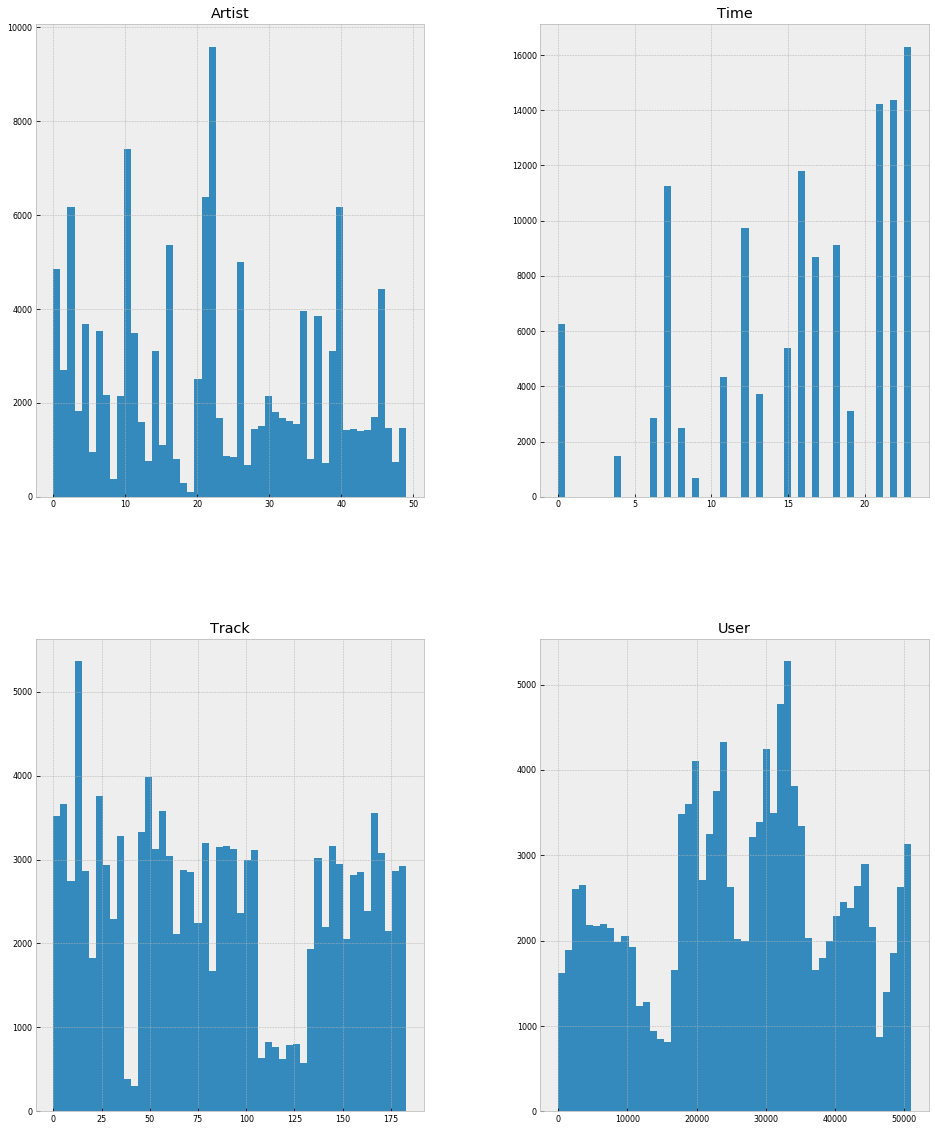

In [18]:
# Répartition des valeurs numériques - Test
test_num = test.select_dtypes(include = ['int64'])
test_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Analyse du csv users

Nous allons maintenant analyser les variables du jeu du csv 'users'. Nous affichons les informations globales et nous commençons par afficher la distribution des variables numériques.

Le fichier user.csv est plutôt bien renseigné, il existe cependant des variables ayant des valeurs nulles, nous devrons les retraiter plus tard. Les données sont de type int64, float64 et object. Les données de type object pourront être retaitées par la suite. Les données catégorielles devront être encodées suivant les inputs demandés par les différents modèles. Le csv 'words' devra lui aussi être retraité afin de remplacer les valeurs vides.

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 27 columns):
RESPID       48645 non-null int64
GENDER       48645 non-null object
AGE          48178 non-null float64
WORKING      35520 non-null object
REGION       47605 non-null object
MUSIC        48645 non-null object
LIST_OWN     42706 non-null object
LIST_BACK    42820 non-null object
Q1           48645 non-null float64
Q2           48645 non-null float64
Q3           48645 non-null float64
Q4           48645 non-null float64
Q5           48645 non-null float64
Q6           48645 non-null float64
Q7           48645 non-null float64
Q8           48645 non-null float64
Q9           48645 non-null float64
Q10          48645 non-null float64
Q11          48645 non-null float64
Q12          48645 non-null float64
Q13          48645 non-null float64
Q14          48645 non-null float64
Q15          48645 non-null float64
Q16          42210 non-null float64
Q17          48645 non-null float64

In [20]:
users.describe()

,RESPID,AGE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,48645.000000,48178.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,...,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,42210.000000,48645.000000,35520.000000,35520.000000
mean,25562.400391,39.277180,49.113570,54.624422,51.284449,37.309125,34.585430,39.333615,33.845330,29.161743,...,55.011029,58.636433,53.665898,46.962657,53.446437,39.664562,35.579258,53.826288,42.232447,41.362631
std,15033.356108,15.955373,27.545252,23.770780,26.487641,23.598351,23.234577,25.744281,25.782182,24.267965,...,25.486398,23.837543,25.389724,26.664165,25.795551,26.061055,25.374290,25.891354,25.680349,26.455730
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12161.000000,25.000000,28.000000,44.000000,31.000000,14.000000,12.000000,14.000000,10.000000,9.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,11.000000,35.000000,17.000000,14.000000
50%,26605.000000,39.000000,51.000000,53.000000,52.000000,34.000000,32.000000,35.000000,30.000000,23.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,32.000000,56.000000,47.000000,45.000000
75%,38766.000000,52.000000,70.000000,71.000000,71.000000,52.000000,51.000000,53.000000,52.000000,49.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,52.000000,71.000000,58.000000,57.000000
max,50927.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


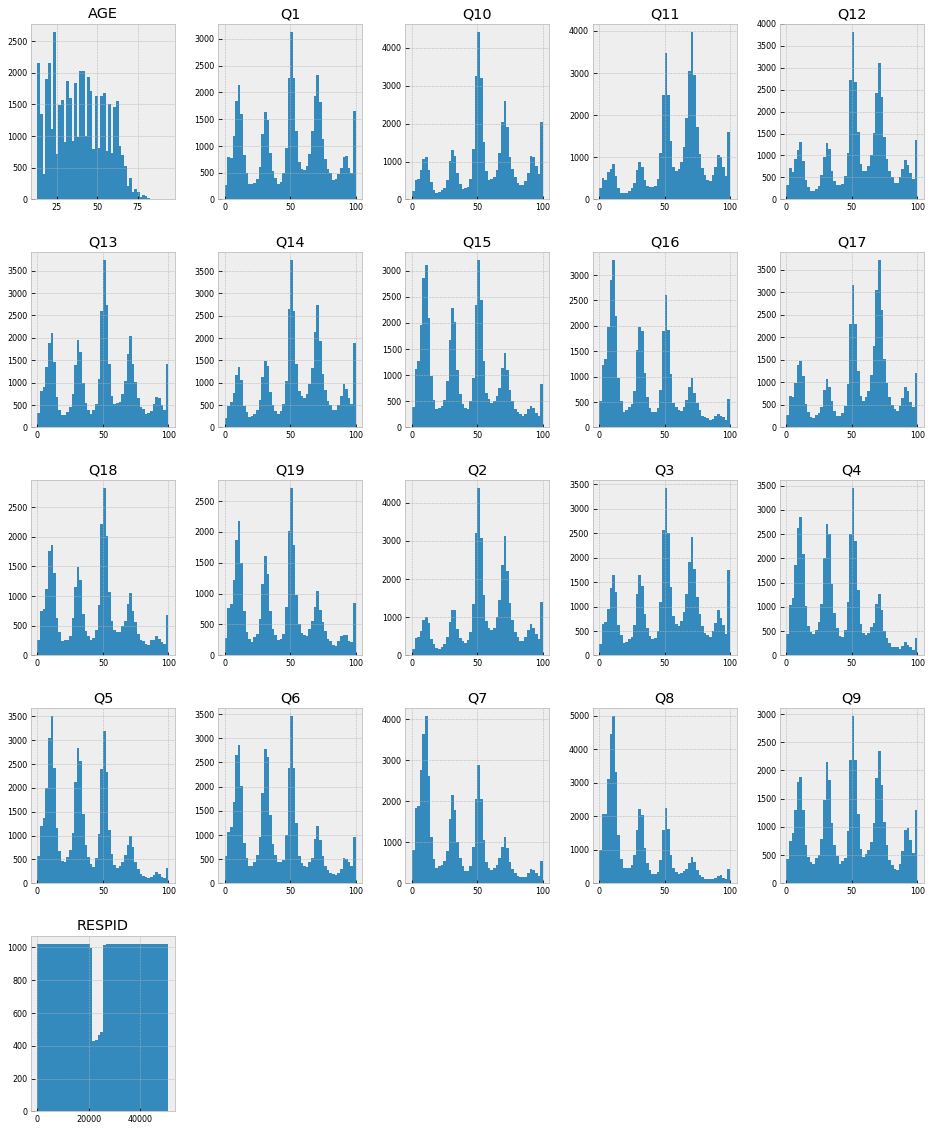

In [21]:
# Répartition des valeurs numériques - users
users_num = users.select_dtypes(include = ['int64', 'float64'])
users_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Les réponses aux questions semblent respecter la même distribution. Lorsque l'on demande à un individu de noter quelque chose entre 0 et 100, les valeurs les plus choisies sont 10 - 25 - 50 - 75 et 90.

Nous faisons de même avec les autres variables : 

<Figure size 432x288 with 0 Axes>

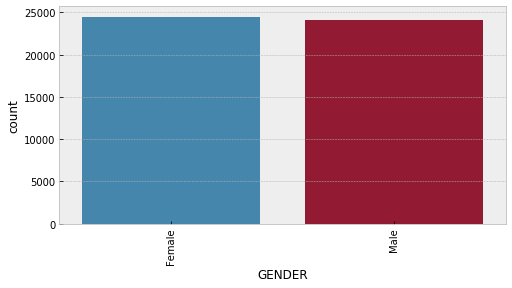

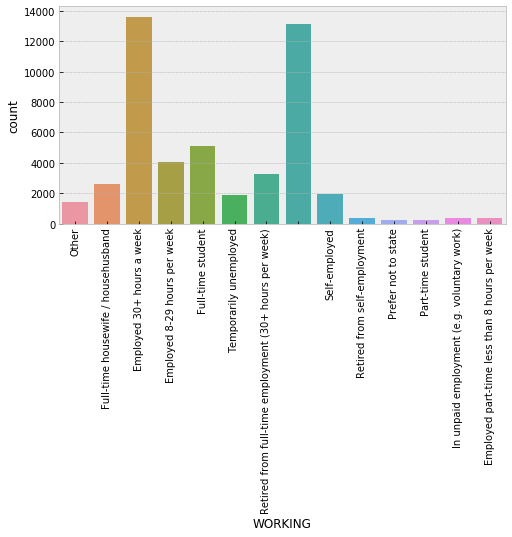

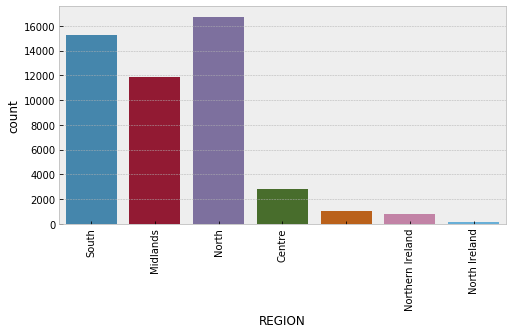

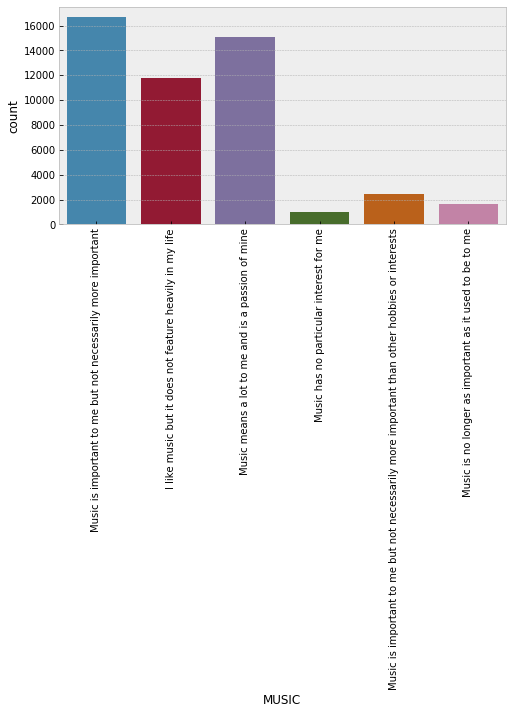

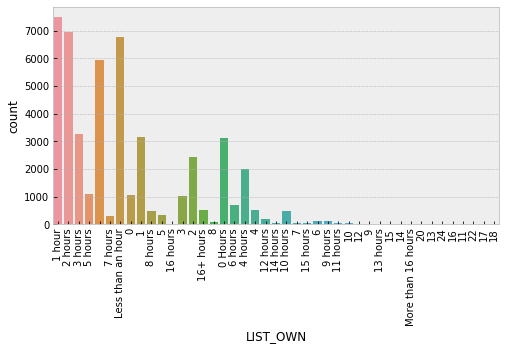

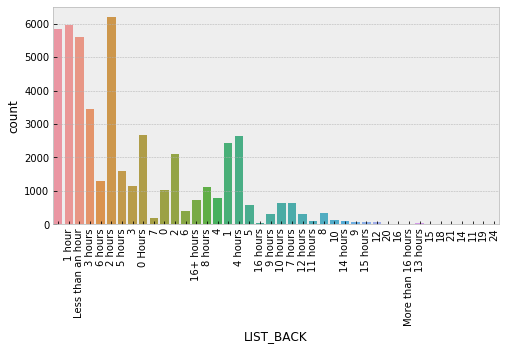

In [22]:
# Répartition des valeurs catégoriques et valeurs - users
#remplissage des valeurs vides par une caine vide
users_cat = users.select_dtypes(['object']).fillna('')

for i, col in enumerate(users_cat.columns):
    plt.figure(i)
    plt.figure(figsize=(8, 4))
    g = sns.countplot(x=col, data=users_cat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)


Nous en déduisons que : 
 * Gender peut être considérée comme une variable booléenne
 * Working, Region et Music peuvent être encodées avec un label encoder si le modèle est non lineaire, avec un binary encoder si le modèle est linéaire (car le nombre de valeurs est restreint)
 * List_own et list_black doivent être retraitées car elles comportent des valeurs en doublonxgboost categorical variable


## Feature engineering du csv user - Valeurs numériques

Nous retraitons les champs LIST_OWN et LIST_BACK pour supprimer les doublons et nous les convertissons en foat64


In [23]:
def list_del_duplicates(df, col):
    return df[col].str.findall(r'\d+').map(lambda x: np.NaN if type(x) != list else 0 if type(x) == list and len(x) == 0 else x[0])

In [24]:
users['LIST_OWN'] = list_del_duplicates(users, 'LIST_OWN').astype('float64')
users['LIST_BACK'] = list_del_duplicates(users, 'LIST_BACK').astype('float64')

0        [1]
1        [1]
2        [1]
3        [2]
4        [3]
5        [5]
6        [1]
7        [1]
8        NaN
9        [7]
10       [2]
11       [2]
12       [] 
13       [1]
14       [2]
15       [3]
16       [5]
17       [0]
18       [2]
19       [0]
20       [1]
21       [] 
22       [2]
23       NaN
24       [] 
25       [0]
26       [1]
27       NaN
28       [2]
29       [8]
        ... 
48615    [1]
48616    [3]
48617    [2]
48618    [2]
48619    [2]
48620    [4]
48621    [1]
48622    [1]
48623    [5]
48624    [2]
48625    [5]
48626    [] 
48627    [3]
48628    [1]
48629    [2]
48630    [] 
48631    [2]
48632    [] 
48633    [0]
48634    [3]
48635    [1]
48636    [6]
48637    [1]
48638    [1]
48639    [] 
48640    [] 
48641    [2]
48642    [2]
48643    [2]
48644    NaN
Name: LIST_OWN, Length: 48645, dtype: object
0     1 hour           
1     1 hour           
2     1 hour           
3     2 hours          
4     3 hours          
5     5 hours          
6     1 hour      

Nous instancions un dictionnaire des variables numériques ayant des valeurs manquantes avec leur médiane associée.


In [25]:
user_num_empty = {'AGE' : users['AGE'].median(),
                  'LIST_OWN' : users['LIST_OWN'].median(),
                  'LIST_BACK' : users['LIST_BACK'].median(),
                  'Q16' : users['Q16'].median(),
                  'Q18' : users['Q18'].median(),
                  'Q19' : users['Q19'].median()
                  }

In [26]:
def apply_median_to_empty_values(df, user_num_empty):
    for key, value in user_num_empty.items():
        df[key] = df[key].fillna(value)
    return df      

In [27]:
users = apply_median_to_empty_values(users, user_num_empty)

<Figure size 432x288 with 0 Axes>

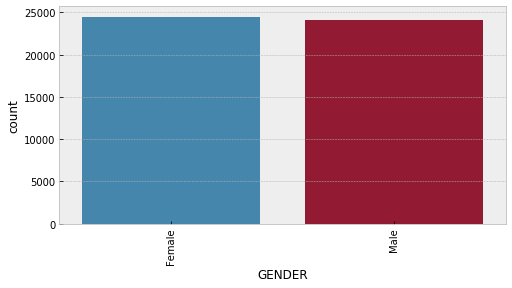

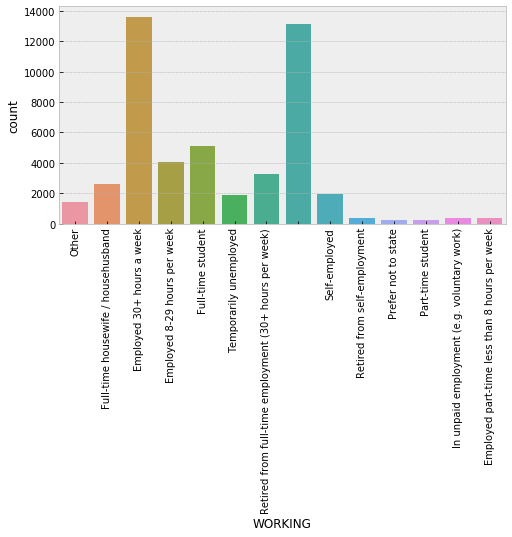

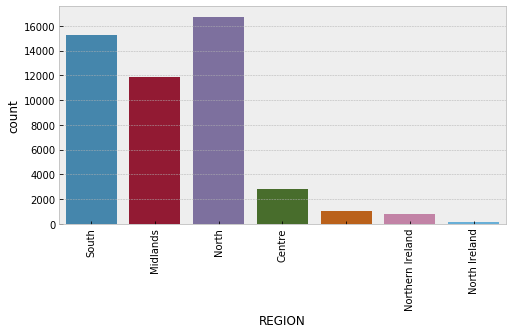

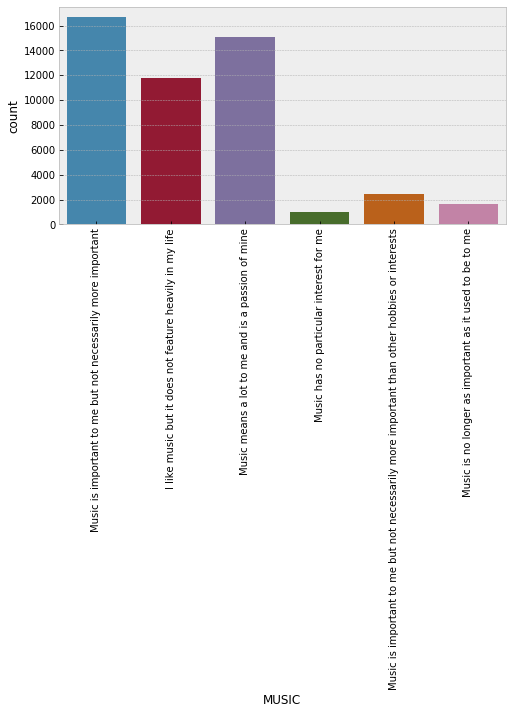

In [28]:
users_cat = users.select_dtypes(['object']).fillna('')

for i, col in enumerate(users_cat.columns):
    plt.figure(i)
    plt.figure(figsize=(8, 4))
    g = sns.countplot(x=col, data=users_cat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

### F.E Valeurs Catégorielles

Nous essayons d'encoder les variables catégorielles avec le catboost encoder TODO expliquer ce que c'est - a faire après le merge des datasets

In [29]:
categorical_features = ['GENDER', 'WORKING', 'REGION', 'MUSIC']

In [30]:
#encoder = ce.CatBoostEncoder(categorical_features)

In [31]:
#encoder.fit(X,y)
#X_cleaned = encoder.transform(X_dirty)

# Analyse du csv words

In [32]:
words.describe()

,Artist,User,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,Laid back,Wholesome,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
count,118301.000000,118301.000000,33308.000000,26154.000000,20724.000000,97577.000000,118301.000000,20724.000000,20724.000000,1040.000000,...,97577.000000,117261.000000,1040.000000,97577.000000,105235.000000,97577.000000,97577.000000,118301.000000,19684.000000,0.0
mean,22.471771,24637.126482,48.121591,0.088782,0.058724,0.053148,0.093304,0.068906,0.124107,0.036538,...,0.083616,0.067644,0.255769,0.019605,0.100423,0.058631,0.036525,0.092036,0.094595,NaN
std,14.717169,13831.302288,21.425649,0.284434,0.235113,0.224329,0.290860,0.253300,0.329712,0.187716,...,0.276813,0.251135,0.436503,0.138639,0.300564,0.234933,0.187593,0.289079,0.292662,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,10.000000,13160.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,22.000000,24242.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,35.000000,35577.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,49.000000,50927.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [33]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
Artist              118301 non-null int64
User                118301 non-null int64
HEARD_OF            118277 non-null object
OWN_ARTIST_MUSIC    33507 non-null object
LIKE_ARTIST         33308 non-null float64
Uninspired          26154 non-null float64
Sophisticated       20724 non-null float64
Aggressive          97577 non-null float64
Edgy                118301 non-null int64
Sociable            20724 non-null float64
Laid back           20724 non-null float64
Wholesome           1040 non-null float64
Uplifting           20724 non-null float64
Intriguing          20724 non-null float64
Legendary           1040 non-null float64
Free                20724 non-null float64
Thoughtful          118301 non-null int64
Outspoken           20724 non-null float64
Serious             97577 non-null float64
Good lyrics         97577 non-null float64
Unattractive        97577 non-null f

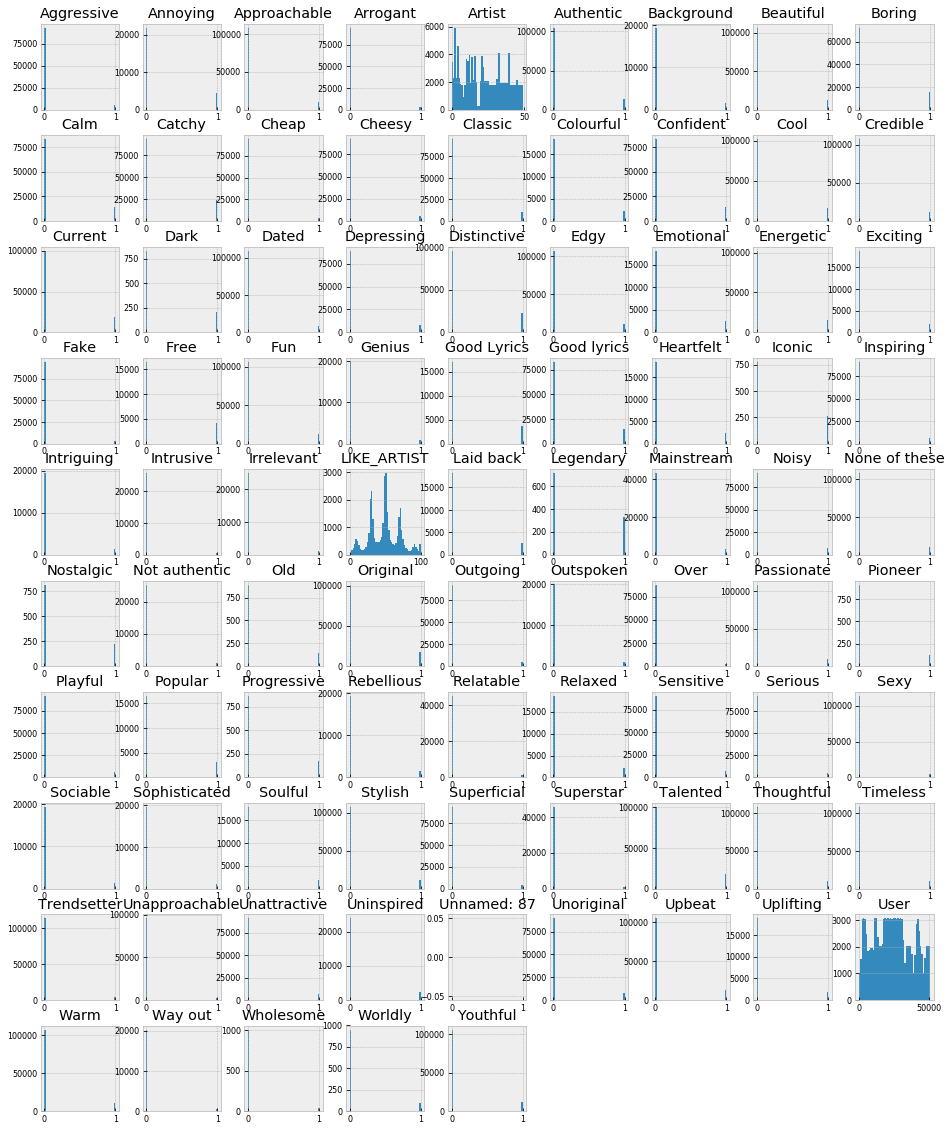

In [34]:
# Répartition des valeurs numériques - users
words_num = words.select_dtypes(include = ['int64', 'float64'])
words_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

On choisit de supprimer la colonne Unnamed: 87 qui ne contient pas de valeurs

In [97]:
words = words.drop(['Unnamed: 87'])

KeyError: "['Unnamed: 87'] not found in axis"

<Figure size 432x288 with 0 Axes>

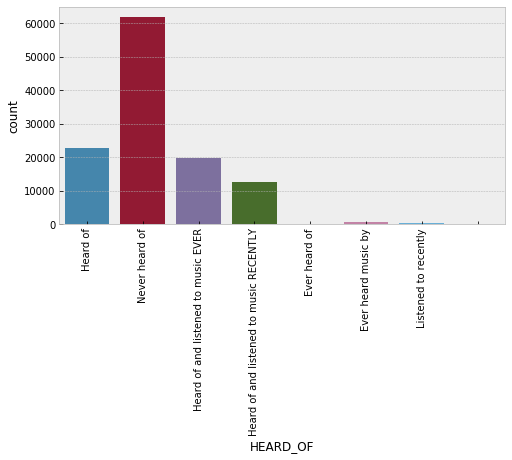

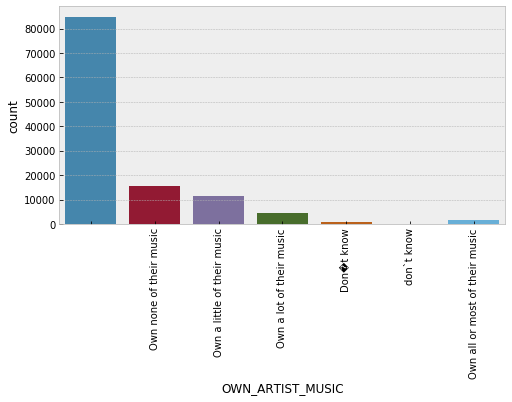

In [98]:
words_cat = words.select_dtypes(['object']).fillna('')


for i, col in enumerate(words_cat.columns):
    plt.figure(i)
    plt.figure(figsize=(8, 4))
    g = sns.countplot(x=col, data=words_cat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

## Feature engineering du csv word - Valeurs numériques

<Figure size 432x288 with 0 Axes>

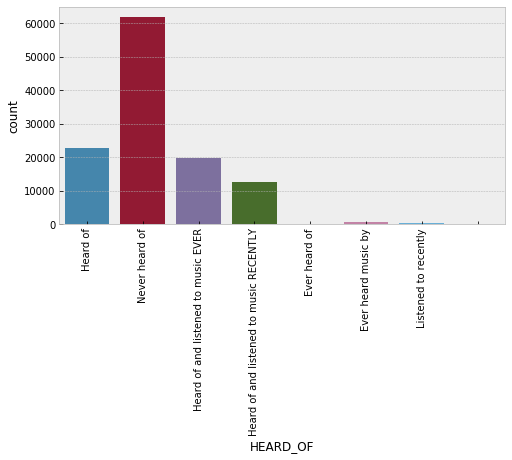

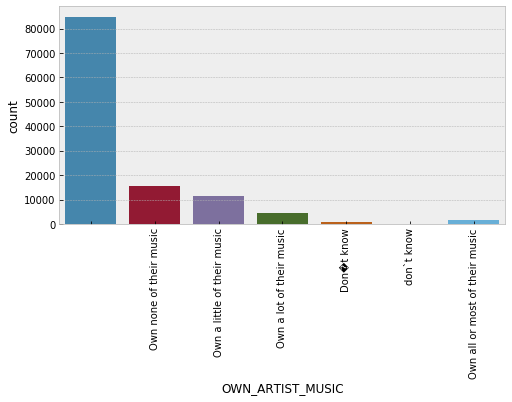

In [81]:
def feature_with_missing_values(df):
    temp = df.isnull().any()
    return list(temp[temp == True].index)

In [82]:
missing_values_features = feature_with_missing_values(words)

In [83]:
type(missing_values_features)

list

In [94]:
def treat_missing_values(df, missing_values_features):
    for feature in missing_values_features:
        if df[feature].dtype == np.float64 or df[feature].dtype == np.int64:
            mediane = df[feature].median()
            print(mediane)
            df[feature].fillna(mediane)
        else:
            df[feature].fillna('')
    return df

In [95]:
treat_missing_values(words,missing_values_features)

49.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
nan


,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
5,23,18082,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
6,23,18080,Never heard of,NaN,NaN,NaN,NaN,0.0,1,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
7,14,31541,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
8,46,43802,Heard of and listened to music EVER,Own none of their music,25.0,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
9,23,18077,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0,NaN,NaN


# Constitution du dataset